In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
 housing = fetch_california_housing()

In [4]:
df = pd.read_csv("housing.csv")
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
#to check null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.total_bedrooms= df.total_bedrooms.fillna(850)

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>

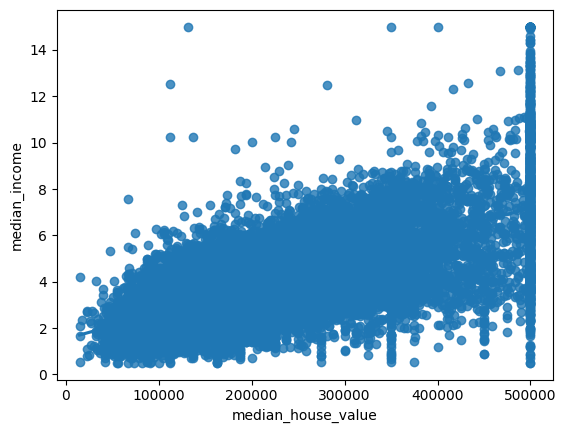

In [10]:
sns.regplot(y=df['median_income'], x=df['median_house_value'])

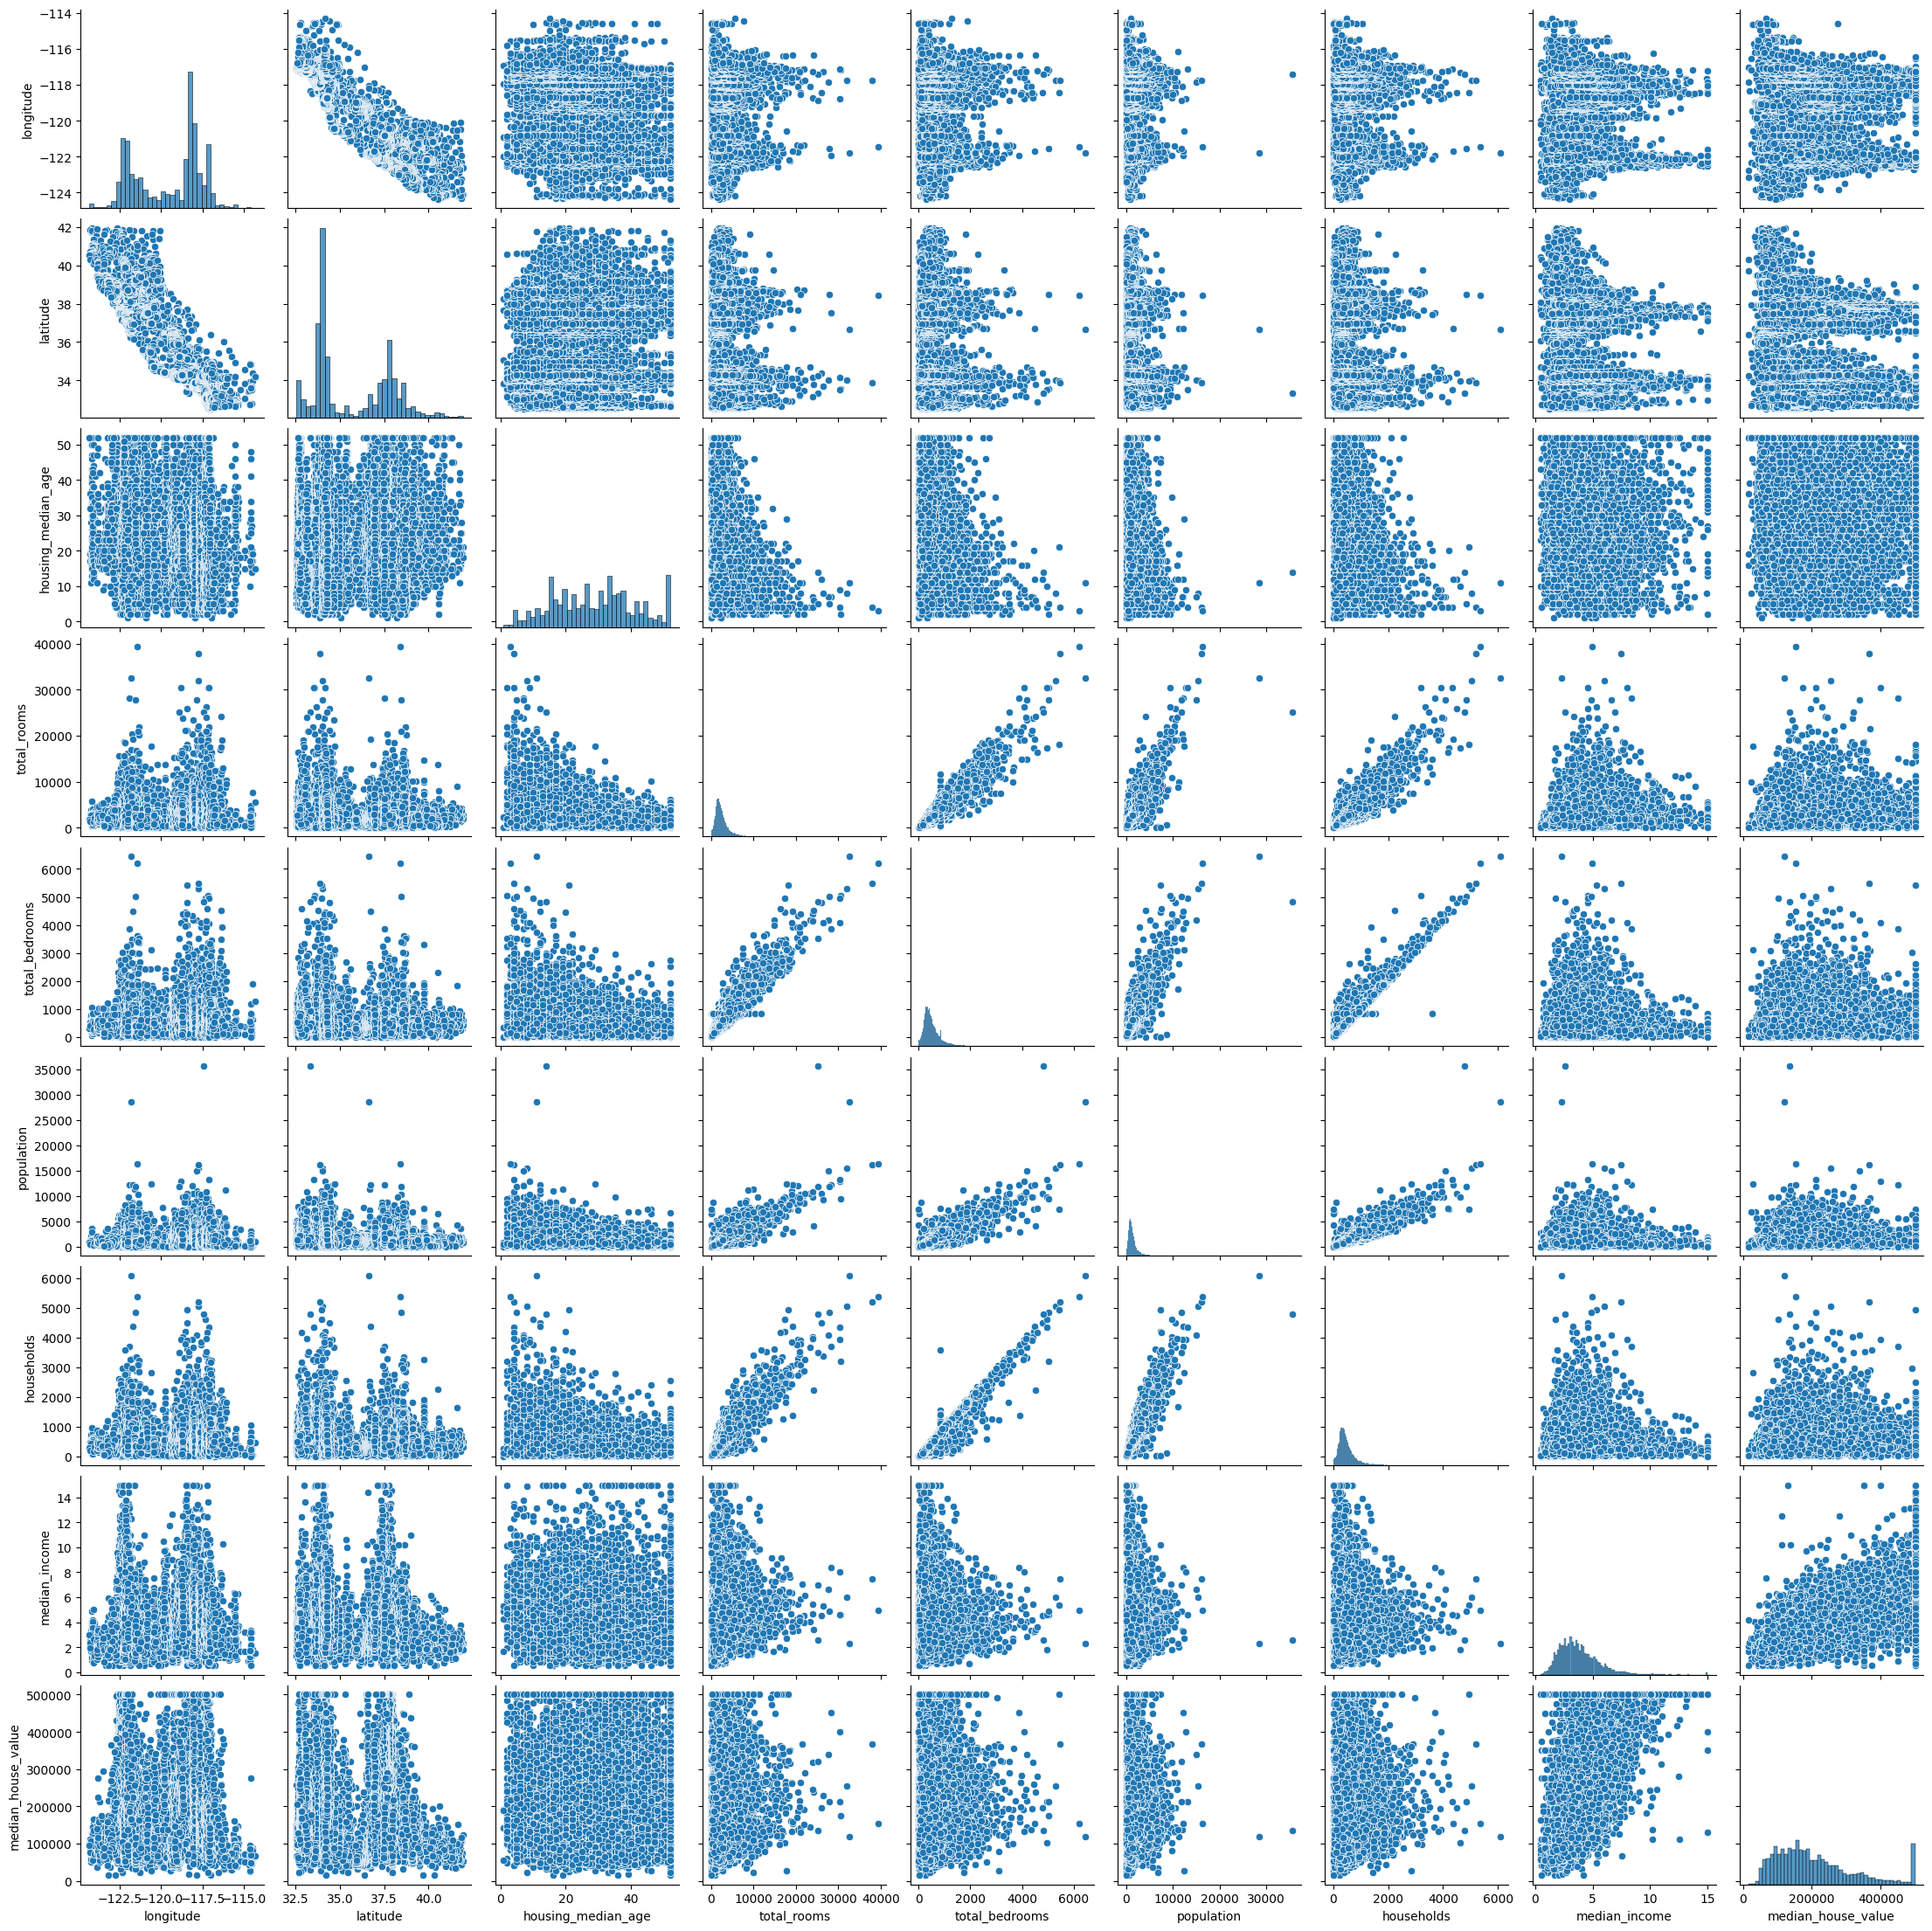

In [11]:
#data visualization
sns.pairplot(df)
plt.show()

/tmp/ipykernel_5331/2180433485.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax = ax[i][j])
/tmp/ipykernel_5331/2180433485.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax = ax[i][j])
/tmp/ipykernel_5331/2180433485.py:8: UserWarning: 

`distplot` is a 

ValueError: could not convert string to float: 'NEAR BAY'

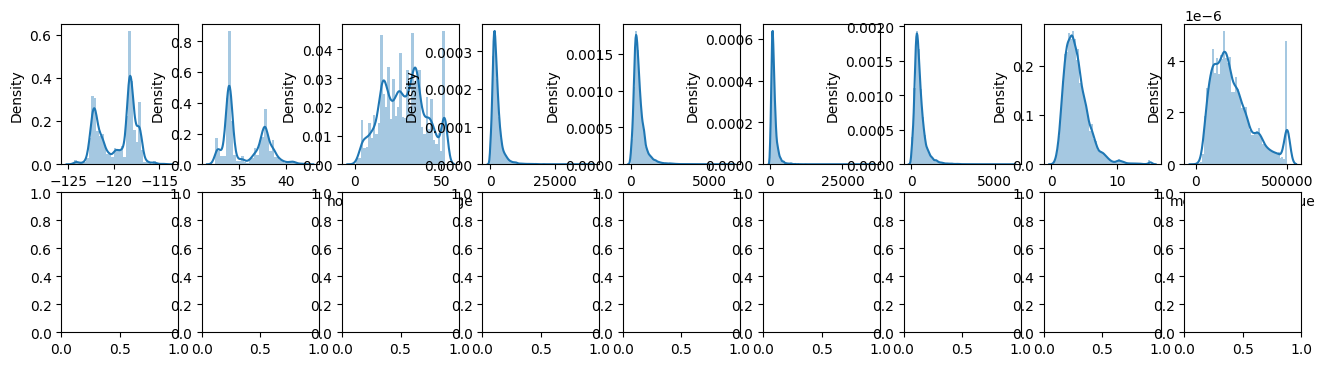

In [12]:
rows = 2
cols = 9
fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()
plt.show()

In [13]:
#correlation coefficient
corrmat = df.corr()
corrmat

/tmp/ipykernel_5331/1558520760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069431,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066944,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317751,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.924462,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069431,-0.066944,-0.317751,0.924462,1.000000,0.871859,0.972258,-0.007851,0.049263
population,0.099773,-0.108785,-0.296244,0.857126,0.871859,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972258,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007851,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049263,-0.024650,0.065843,0.688075,1.000000


/tmp/ipykernel_5331/2347823698.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


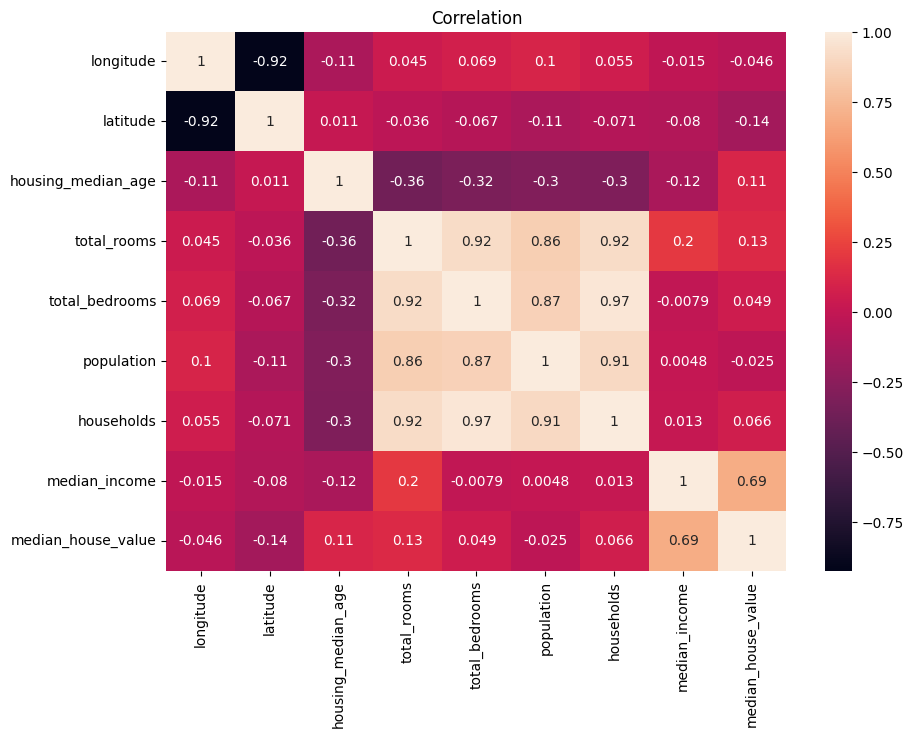

In [14]:
#heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [15]:
corrmat.index.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [16]:
#to select features accurately to get the target value
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['median_income'], threshold)
corr_value

,Corr Value
median_income,1.000000
median_house_value,0.688075


In [17]:
corr_value.index.values

array(['median_income', 'median_house_value'], dtype=object)

In [18]:
correlated_data = df[corr_value.index]
correlated_data.head()

,median_income,median_house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200


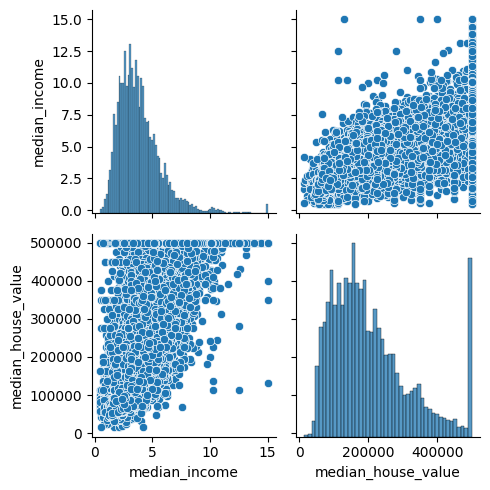

In [19]:
#Pairplot and Corrmat of correlated data(to plot between features and target variable)
sns.pairplot(correlated_data)
plt.tight_layout()

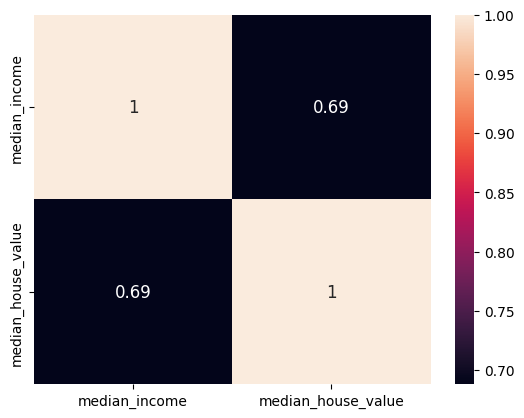

In [20]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12},linewidth =0)
plt.show()

In [21]:
#Shuffle and Split Data
X = correlated_data.drop(labels=['median_income'], axis = 1)
y = correlated_data['median_income']
X.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape  

((16512, 1), (4128, 1))

In [26]:
#to traina and fit the model #schikit learn package helps to reduce the no. of lines in ur code
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression()
y_predict = model.predict(X_test)
df = pd.DataFrame(data = [y_predict, y_test])
df.T
# T =to transpose the matrix # 0 column-predicted values, 1 column-actual values

,0,1
0,3.073059,4.1518
1,4.265075,5.7796
2,3.801513,4.3487
3,2.337754,2.4511
4,6.762143,5.0049
...,...,...
4123,3.445278,2.4817
4124,3.846042,4.3839
4125,2.978291,3.2027
4126,4.472878,6.1436


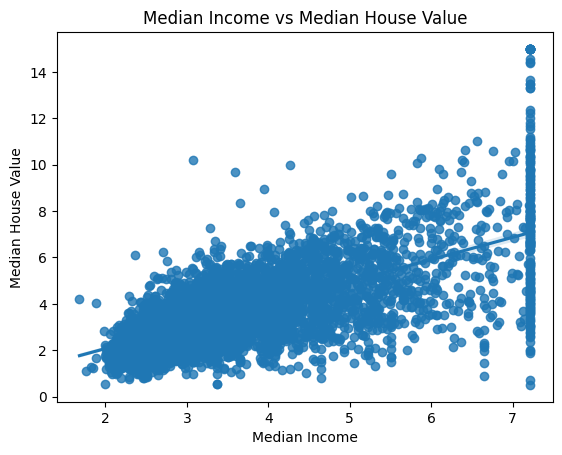

In [27]:
sns.regplot(x=y_predict, y=y_test)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()

In [28]:
from sklearn.metrics import r2_score

In [29]:
correlated_data.columns

Index(['median_income', 'median_house_value'], dtype='object')

In [30]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('r2_score: ', score)
print('Mean_absolute_error: ', mae)
print('Mean_squared_error: ', mse)

r2_score:  0.4463497711091482
Mean_absolute_error:  1.0157009164123874
Mean_squared_error:  1.9392672430879478


In [31]:
#to store feature performance to have a history to make further predictions
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [32]:
def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                    index = ['features name', '#feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    return metrics_dataframe.T

In [33]:
#featurelist,th)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['median_income' 'median_house_value'],1,0.5,0.44635,1.015701,1.939267


In [34]:
#Let's find out other combination of columns to get better accuracy with >60%

In [35]:
corrmat['median_income']

longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
total_rooms           0.198050
total_bedrooms       -0.007851
population            0.004834
households            0.013033
median_income         1.000000
median_house_value    0.688075
Name: median_income, dtype: float64

In [36]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['median_income'], threshold)
corr_value

,Corr Value
median_income,1.000000
median_house_value,0.688075


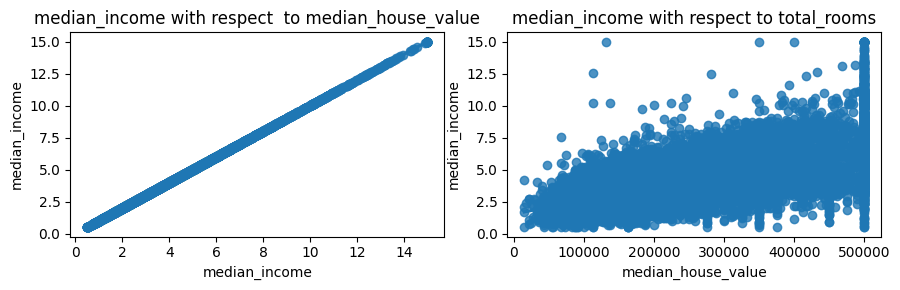

In [48]:
#Regression plot of the features correlated with the median income
rows = 1
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (9, 3))
ax[0].set_title("median_income with respect  to median_house_value")
ax[1].set_title("median_income with respect to total_rooms")

col = correlated_data.columns
index = 0

for i in range(cols):
    sns.regplot(x = correlated_data[col[index]], y = correlated_data['median_income'], ax = ax[i])
    index = index + 1
fig.tight_layout()

In [49]:
#to find out combination of columns to get better accuracy > 70%

In [50]:
corrmat['median_income']

longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
total_rooms           0.198050
total_bedrooms       -0.007851
population            0.004834
households            0.013033
median_income         1.000000
median_house_value    0.688075
Name: median_income, dtype: float64

In [51]:
threshold = 0.70
corr_value = getCorrelatedFeature(corrmat['median_income'], threshold)
corr_value

,Corr Value
median_income,1.0


In [49]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [50]:
model = LinearRegression()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4463497711091482

In [51]:
#Defining performance metrics
#Plotting Learning Curves

from sklearn.model_selection import learning_curve, ShuffleSplit

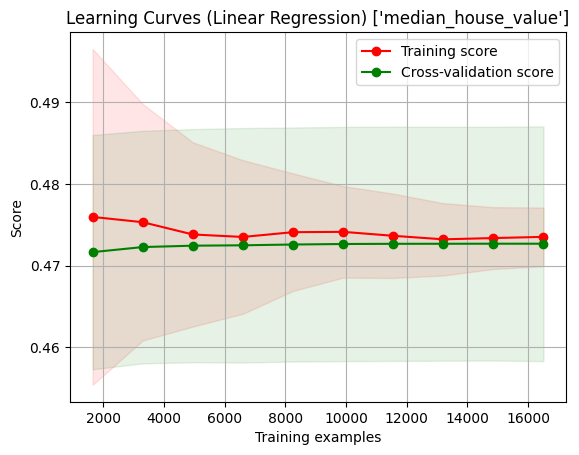

In [52]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X = correlated_data.drop(labels = ['median_income'], axis = 1)
y = correlated_data['median_income']

title = "Learning Curves (Linear Regression) " + str(X.columns.values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

In [53]:
# standardization
#"Standardization" typically means that the range of values are "standardized" 
# to measure how many standard deviations the value is from its mean.
